#            **Maestria en Ciencia de Datos**
##           **Análisis Cuantitativo**
##           **Examen 1**

**Profesores:** Santiago Ortiz - Henry Velasco

**Integrantes:**
* Andrea Valencia
* David Casanova
* Pedro Jojoa
* Mario Solano

In [ ]:
#Importando las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy.stats import ttest_1samp
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from math import sqrt


from pandas.plotting import scatter_matrix
import seaborn as sns


#Libreria para no mostrar las advertencias
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Ejercicio 1


In [ ]:
#Cargamos los datos
df_1 = pd.read_excel('/content/drive/MyDrive/Maestría CDD/Análisis Cuantitativo/Actividad Evaluativa 1/data_exam1.xlsx')

In [ ]:
df_1.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


[]

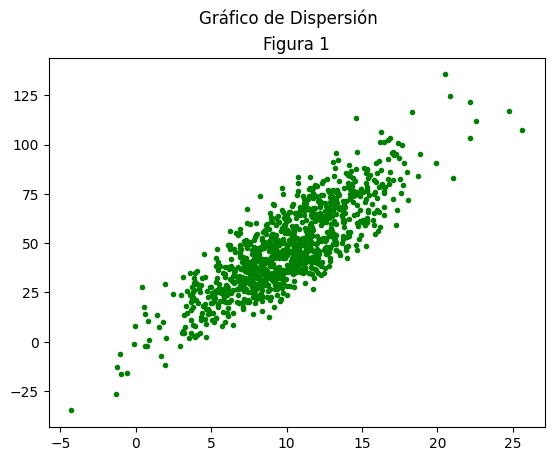

In [ ]:
#Sin ver la diferencia con la varaible categorica si parece existir una relacion lineal

fig, ax = plt.subplots()

fig.suptitle('Gráfico de Dispersión')

ax.plot(df_1['X'],df_1['Y'],'.', color ='green')

plt.title('Figura 1')
plt.plot()

Según la **Figura 1** observamos un comportamiento elíptico lo cual consideramos que se puede generar un modelo de regresión lineal.

In [ ]:
#Reordenamos el dataset
df_1 = df_1[['X','Ind','Y']]

#Calculamos la matriz de covarianzas
Sigma = df_1.cov().values

#Separamos la matriz
Sigma_XX = Sigma[0:-1,0:-1]
Sigma_XY = Sigma[0:-1,-1]

#Calculamos los coeficientes
betha_1p = np.linalg.inv(Sigma_XX)@Sigma_XY
betha_0 = df_1[['Y']].mean()- df_1.drop('Y',axis =1).mean(axis=0).values@betha_1p

#Unimos los coeficientes
bethas = np.concatenate((betha_0,betha_1p),axis =0)
print(bethas)

[  0.78732709   4.91160016 -14.17957698]


Nuestra recta de regresión quedaria entonces de la forma:

$$\hat{y} = 0.787 + 4.911*X - 14.179*Ind$$

Con un coeficiente $\hat{\beta_1}=4.911$, podemos concluir que por cada aumento en una unidad de la variable "X" se espera que en promedio la varible "y" **AUMENTE** (porque el signo es positivo) 4.911 unidades.

Con el coeficiente $\hat{\beta_2}=-14.179$ se espera que el intercepto cuando Ind es 1 sea menor 13.024 unidades

[]

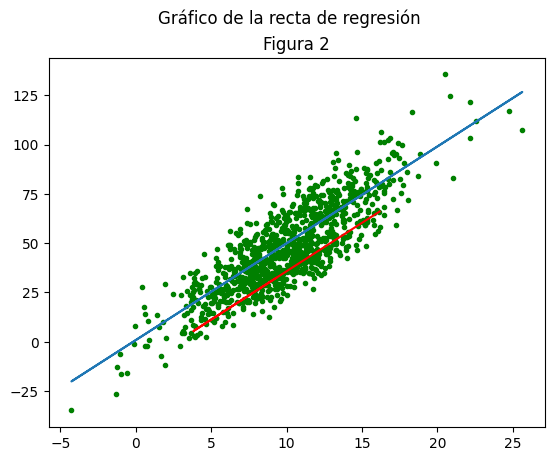

In [ ]:
#Creamos la matriz de disenio
X = np.column_stack((np.ones(df_1.drop('Y',axis =1).shape[0]), df_1.drop('Y',axis =1)))

#Calculamos los estimados
y_hat = X@bethas

#Visualizamos la recta de regresión

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la recta de regresión')

ax.plot(df_1['X'], df_1['Y'], '.', color ='green')

ax.plot(df_1['X'][df_1['Ind']==0], y_hat[df_1['Ind']==0])

ax.plot(df_1['X'][df_1['Ind']==1], y_hat[df_1['Ind']==1],color ='red')

plt.title('Figura 2')
plt.plot()

[]

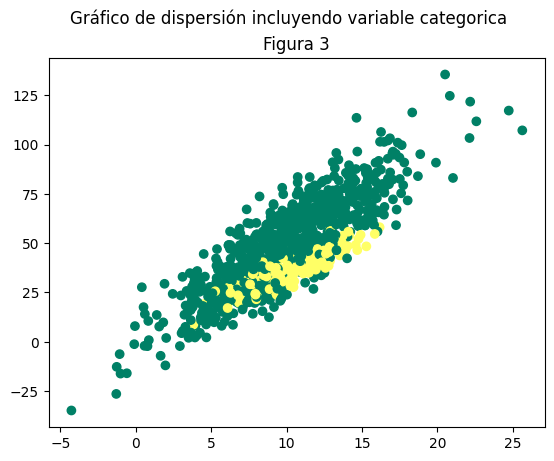

In [ ]:
# Al incluir la variable categorica si se nota una leve diferencia entre las tasas

fig, ax = plt.subplots()

fig.suptitle('Gráfico de dispersión incluyendo variable categorica')

ax.scatter(df_1['X'], df_1['Y'], c = df_1['Ind'], cmap = 'summer')


plt.title('Figura 3')
plt.plot()

En la **figura 3** se observa la gráfica de dispersión considerando la variable categorica Ind y podemos identificar una diferencia en las inclinaciones de cada uno de los valores de esta variable.

In [ ]:
#Se incluye una columna con la interacion de las variables explicativas
df_1['Interaccion'] = df_1['X']*df_1['Ind']

#Reordenamos el dataset
df_1 = df_1[['X','Ind','Interaccion','Y']]

#Calculamos la matriz de covarianzas
Sigma = df_1.cov().values

#Separamos la matriz
Sigma_XX = Sigma[0:-1,0:-1]
Sigma_XY = Sigma[0:-1,-1]

#Calculamos los coeficientes
betha_1p = np.linalg.inv(Sigma_XX)@Sigma_XY
betha_0 = df_1[['Y']].mean()- df_1.drop('Y',axis =1).mean(axis=0).values@betha_1p

#Unimos los coeficientes
bethas_interaccion = np.concatenate((betha_0,betha_1p),axis =0)
print(bethas_interaccion)


[-0.49909696  5.04112853  4.54908122 -1.84664002]


Nuestra recta de regresión quedaria entonces de la forma:

$$\hat{y} = -0.499+5.041*x+4.549*ind-1.847*x*ind$$

[]

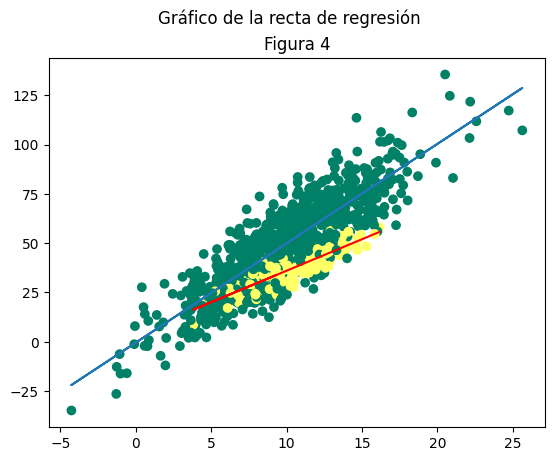

In [ ]:
#Creamos la matriz de disenio
X = np.column_stack((np.ones(df_1.drop('Y',axis =1).shape[0]), df_1.drop('Y',axis =1)))

#Calculamos los estimados
y_hat = X@bethas_interaccion

#Visualizamos la recta de regresión

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la recta de regresión')

ax.scatter(df_1['X'], df_1['Y'], c = df_1['Ind'], cmap = 'summer')

ax.plot(df_1['X'][df_1['Ind']==0], y_hat[df_1['Ind']==0])

ax.plot(df_1['X'][df_1['Ind']==1], y_hat[df_1['Ind']==1],color ='red')

plt.title('Figura 4')
plt.plot()

 El modelo con interacción nos indica que cuando la variable Ind es igual a cero tenemos una pendiente para X de *5.041*, pero cuando la variable Ind es igual a 1 entra en juego la interacción por lo que la pendiente para X disminuye a *3.194*. De igual manera el intercepto, cuando Ind es igual a cero entonces el intercepto es *-0.499* pero cuando es 1 entonces es *4.050*.

Se procede a evaluar los supuestos del modelo.

TtestResult(statistic=1.0091912870448832e-14, pvalue=0.999999999999992, df=999)


[]

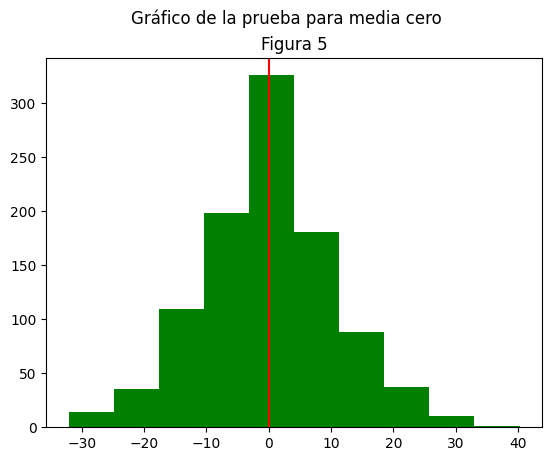

In [ ]:
#Calculo de los residuale

residuales = df_1['Y'] - y_hat

## 1) Media cero en los residales
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba para media cero')

ax.hist(residuales, color = 'green')
ax.axvline(np.mean(residuales), color = "red")

plt.title('Figura 5')
plt.plot()

#### Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente
#### para rechazar la hipotesis nula

Como el p-valor es mayor a 0.05, se puede decir con un nivel de significancia del 0.05 que no existe evidencia para rechazar la hipotesis nula. Entonces se asume que la media de los residuales es cero.

ShapiroResult(statistic=0.9961399539741619, pvalue=0.013784609851145537)
KstestResult(statistic=0.3878699579223034, pvalue=6.035150462642941e-136, statistic_location=-2.0939988335881736, statistic_sign=1)
AndersonResult(statistic=1.580915878804035, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.4106051316484808e-15, scale=10.687052646925942)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=4.811263115173176, pvalue=0.09020850574930844)


[]

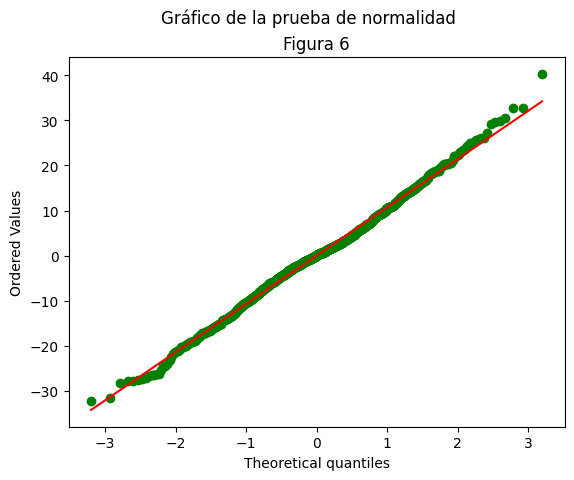

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(anderson(residuales))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba de normalidad')
probplot(residuales, dist = "norm", plot = pylab)
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_markeredgecolor('g')

plt.title('Figura 6')
plt.plot()

El valor p de 0.013784609851145537 en la prueba de Shapiro-Wilk indica que se rechaza la hipótesis nula de normalidad con un nivel de significancia de 0.05. Esto significa que los datos no provienen de una distribución normal.

El valor p de 6.035150462642941e-136 en la prueba de Kolmogorov-Smirnof indica que se rechaza la hipótesis nula de normalidad con un nivel de significancia de 0.05. Esto significa que los datos no provienen de una distribución normal.


Como el valor del estadistico 0.784 > 0.05 en la prueba de Anderson Darliong indica que se rechaza la hipótesis nula de normalidad con un nivel de significancia de 0.05. Esto significa que los datos no provienen de una distribución normal.

El pvalor de 0.09020850574930844 en la prueba de Jarque Bera sugieren que existe probabilidad de que los datos provengan de una distribucion normal.

Al considerar las cuatro pruebas realizadas se concluye que los residuales no se comportan de manera normal.

1.9848054259274441


[]

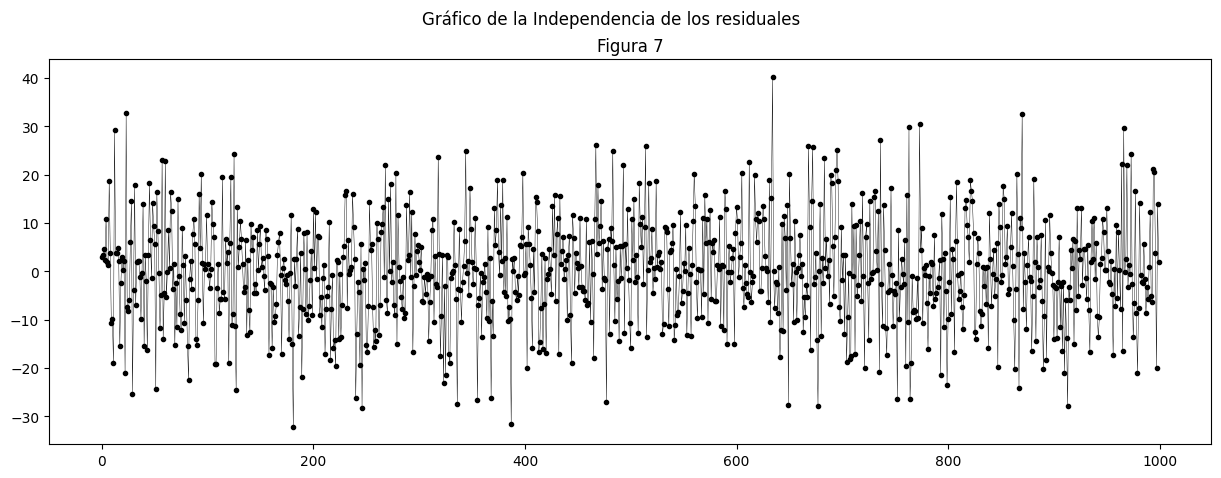

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)

### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 2.2 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.


fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle('Gráfico de la Independencia de los residuales')

ax.plot(residuales, '.-', color = "black", linewidth = 0.3)

plt.title('Figura 7')
plt.plot()

Como el estadistico de la prueba Durvin Watson 1.9848 se encuentra entre el rango [1.5, 2.5] no existe suficiente evidencia muestral para rechazar la hipotesis nula por lo tanto se supone que los residuales son independientes.

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(df_1['X']))

### Como el p-valor 0.08 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral
### suficiente para rechazar la hipotesis nula por lo tanto supongo Homocedaticidad

(2.903319287532513,
 0.08839735423724872,
 2.905949548329742,
 0.08856449953023292)

Como el p-valor de 0.088 es mayor al alfa de 0.05 no existe evidencia muestral suficiente para rechazar la hipotesis nula. Por lo que se supone Homocedasticidad.

### Ejercicio 2



In [ ]:
#Cargamos los datos
df_2 = pd.read_excel('/content/drive/MyDrive/Maestría CDD/Análisis Cuantitativo/Actividad Evaluativa 1/data_exam1.xlsx', sheet_name='data2')

In [ ]:
df_2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


In [ ]:
#Observamos los estadisticos descriptivos del dataset
df_2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


[]

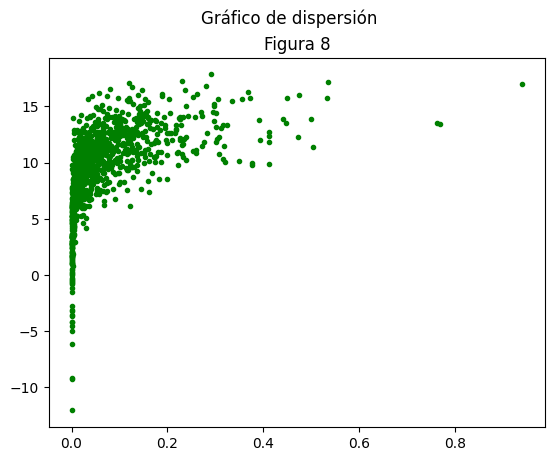

In [ ]:
#Graficamos un grafico de dispersion para las variables

fig, ax = plt.subplots()

fig.suptitle('Gráfico de dispersión')
ax.plot(df_2['X'],df_2['Y'],'.', color ='green')

plt.title('Figura 8')
plt.plot()

La **figura 8** nos muestra una relación no lineal entre X y Y, con mayor dispersión en los valores altos de X.

In [ ]:
#Creamos varias transformaciones para la column X

#Transformacion exponencial
df_2['X_exponencial'] = np.exp(df_2['X'])
#Transformacion raiz cuadrada
df_2['X_sqr'] = np.sqrt(df_2['X'])
#Transformacion logaritmica
df_2['X_logaritmica'] = np.log(df_2['X'])
#Transformacion potencia de dos
df_2['X_potencia'] = np.power(df_2['X'],2)
#Transformacion potencia de tres
df_2['X_potencia1_20'] = np.power(df_2['X'],1/20)
#Transformacion logaritmica base 10
df_2['X_logaritmica10'] = np.log10(df_2['X'])
#Tranformacion box_cox
df_2['X_boxcox'] = (np.power(df_2['X'],1/10)- 1)*10
#Transformacion sinusoidal
df_2['X_sinusoidal'] = np.sin(df_2['X'])
#Transformacion arcotangente
df_2['X_tangente'] = np.arctan(df_2['X'])

[]

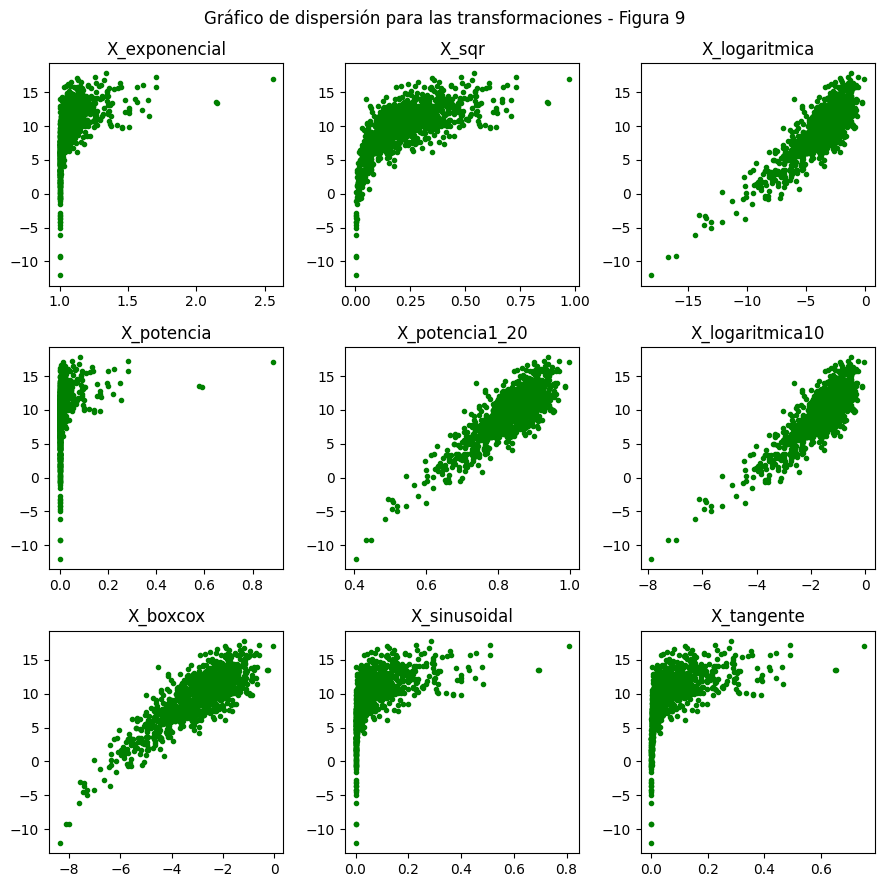

In [ ]:
fig, ax =   plt.subplots(nrows=3, ncols=3, figsize=(9,9))

#fig.suptitle('Gráfico de dispersión para las transformaciones')
#fig.suptitle(title)

plt.suptitle('Gráfico de dispersión para las transformaciones - Figura 9')

ax[0,0].plot(df_2['X_exponencial'],df_2['Y'],'.', color ='green')
ax[0,0].set_title('X_exponencial')

ax[0,1].plot(df_2['X_sqr'],df_2['Y'],'.', color ='green')
ax[0,1].set_title('X_sqr')

ax[0,2].plot(df_2['X_logaritmica'],df_2['Y'],'.', color ='green')
ax[0,2].set_title('X_logaritmica')

ax[1,0].plot(df_2['X_potencia'],df_2['Y'],'.', color ='green')
ax[1,0].set_title('X_potencia')

ax[1,1].plot(df_2['X_potencia1_20'],df_2['Y'],'.', color ='green')
ax[1,1].set_title('X_potencia1_20')

ax[1,2].plot(df_2['X_logaritmica10'],df_2['Y'],'.', color ='green')
ax[1,2].set_title('X_logaritmica10')

ax[2,0].plot(df_2['X_boxcox'],df_2['Y'],'.', color ='green')
ax[2,0].set_title('X_boxcox')

ax[2,1].plot(df_2['X_sinusoidal'],df_2['Y'],'.', color ='green')
ax[2,1].set_title('X_sinusoidal')

ax[2,2].plot(df_2['X_tangente'],df_2['Y'],'.', color ='green')
ax[2,2].set_title('X_tangente')

plt.tight_layout()
plt.plot()

Al revisar los gráficos de dispersión para cada una de las transformaciones obtenemos cuatro posibles candidatos para el modelo: X_logaritmica, X_potencia1_20, X_logaritmica10 y X_boxcox. Vamos a crear modelos para cada uno y a evaluarlos con el RMSE.

In [ ]:
#La lista de transformaciones a utilizar
transformaciones = ['X_logaritmica','X_potencia1_20','X_logaritmica10','X_boxcox']

bethas = []

#iteramos para cada uno de ellos
for i in transformaciones:
  #Filtramos el dataset
  df_temp = df_2[[i,'Y']]

  #Calculamos la matriz de covarianzas
  Sigma = df_temp.cov().values

  #Separamos la matriz
  Sigma_XX = Sigma[0:-1,0:-1]
  Sigma_XY = Sigma[0:-1,-1]

  #Calculamos los coeficientes
  betha_1p = np.linalg.inv(Sigma_XX)@Sigma_XY
  betha_0 = df_temp[['Y']].mean()- df_temp.drop('Y',axis =1).mean(axis=0).values@betha_1p

  #Unimos los coeficientes
  bethas_completos = np.concatenate((betha_0,betha_1p),axis =0)
  bethas.append(bethas_completos)

In [ ]:
#Se obtienen los coeficientes para cada una de las trasnformaciones
bethas

[array([15.17056078,  1.49868429]),
 array([-23.26376456,  39.36361285]),
 array([15.17056078,  3.4508481 ]),
 array([16.967081  ,  2.48746121])]

In [ ]:
#Calculamos los estimados para cada transformacion

#Creamos la matriz de disenio
X_logaritmica = np.column_stack((np.ones(df_2.shape[0]), df_2['X_logaritmica']))
X_potencia1_20 = np.column_stack((np.ones(df_2.shape[0]), df_2['X_potencia1_20']))
X_logaritmica10 = np.column_stack((np.ones(df_2.shape[0]), df_2['X_logaritmica10']))
X_boxcox = np.column_stack((np.ones(df_2.shape[0]), df_2['X_boxcox']))

#Calculamos los estimados
y_hat_logaritmica = X_logaritmica@bethas[0]
y_hat_potencia1_20 = X_potencia1_20@bethas[1]
y_hat_logaritmica10 = X_logaritmica10@bethas[2]
y_hat_boxcox = X_boxcox@bethas[3]

In [ ]:
#RMSE_Pearson = sqrt(mean_squared_error(y_test, y_hat_Pearson))
RMSE_logaritmica = sqrt(mean_squared_error(df_2['Y'], y_hat_logaritmica))
RMSE_potencia1_20 = sqrt(mean_squared_error(df_2['Y'], y_hat_potencia1_20))
RMSE_logaritmica10 = sqrt(mean_squared_error(df_2['Y'], y_hat_logaritmica10))
RMSE_boxcox = sqrt(mean_squared_error(df_2['Y'], y_hat_boxcox))

print(RMSE_logaritmica)
print(RMSE_potencia1_20)
print(RMSE_logaritmica10)
print(RMSE_boxcox)

print(RMSE_logaritmica == RMSE_logaritmica10)

2.022221356638851
2.048598924645491
2.022221356638851
2.119638882434116
True


Los valores más pequeños del RMSE son para la transformación logarimica natural y logaritmica base 10 por lo que se hará la comparación con el MAE.

In [ ]:
MAE_logaritmica = sqrt(median_absolute_error(df_2['Y'], y_hat_logaritmica))
MAE_potencia1_20 = sqrt(median_absolute_error(df_2['Y'], y_hat_potencia1_20))
MAE_logaritmica10 = sqrt(median_absolute_error(df_2['Y'], y_hat_logaritmica10))
MAE_boxcox = sqrt(median_absolute_error(df_2['Y'], y_hat_boxcox))

print(MAE_logaritmica)
print(MAE_potencia1_20)
print(MAE_logaritmica10)
print(MAE_boxcox)

print(MAE_logaritmica > MAE_logaritmica10)

1.1618006016531037
1.1695463726123165
1.161800601653103
1.1802065774192758
True


Al comparar MAE se concluye, por muy poco, que la logaritmica base 10 es la mejor transformación.

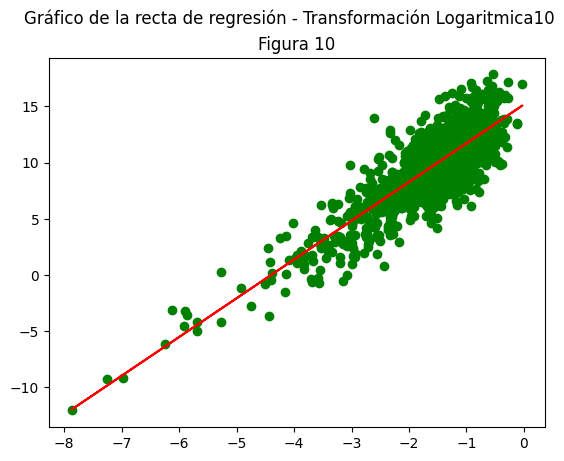

In [ ]:
#Visualizamos la recta de regresión

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la recta de regresión - Transformación Logaritmica10')

ax.scatter(df_2['X_logaritmica10'], df_2['Y'], color = 'green')

ax.plot(df_2['X_logaritmica10'], y_hat_logaritmica10,color = 'red')

plt.title('Figura 10')
plt.show()

La **figura 10** muestra una relación positiva y significativa entre las variables después de aplicar una transformación logarítmica.

TtestResult(statistic=-5.774941628894948e-15, pvalue=0.9999999999999953, df=999)


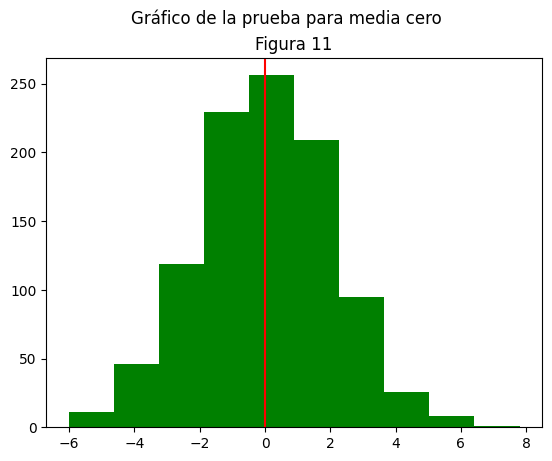

In [ ]:
#Calculo de los residuales

residuales = df_2['Y']- y_hat_logaritmica10

## 1) Media cero en los residales
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba para media cero')

ax.hist(residuales, color = 'green')
ax.axvline(np.mean(residuales), color = "red")

plt.title('Figura 11')
plt.show()

#### Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente
#### para rechazar la hipotesis nula

Como el p-valor es mayor a 0.05, se puede decir con un nivel de significancia del 0.05 que no existe evidencia para rechazar la hipotesis nula. Entonces se asume que la media de los residuales es cero.

ShapiroResult(statistic=0.9991617550230457, pvalue=0.9427671920709753)
KstestResult(statistic=0.1663821465256064, pvalue=1.1549379963081223e-24, statistic_location=-1.486164152263719, statistic_sign=1)
AndersonResult(statistic=0.0972721109254735, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-3.694822225952521e-16, scale=2.0232332262826764)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=0.30516067253031154, pvalue=0.858489923311897)


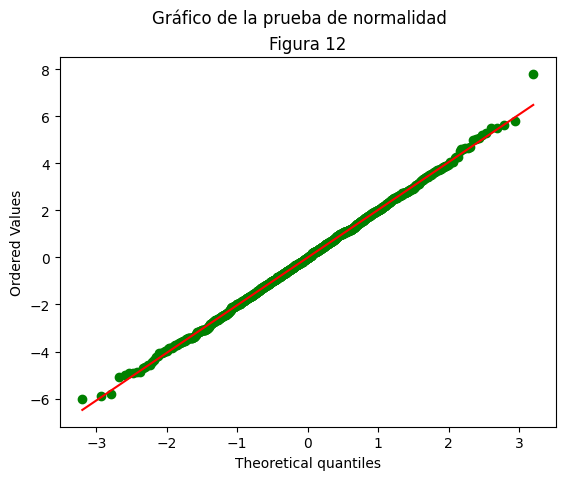

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(anderson(residuales))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba de normalidad')
probplot(residuales, dist = "norm", plot = pylab)
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_markeredgecolor('g')

plt.title('Figura 12')
plt.show()

El p-valor de 0.9427671920709753 en la prueba de Shapiro-Wilk indica que se rechaza la hipótesis nula de normalidad con un nivel de significancia de 0.05. Esto significa que los datos no provienen de una distribución normal.

El p-valor de 1.1549379963081223e-24 en la prueba de Kolmogorov-Smirnof indica que se rechaza la hipótesis nula de normalidad con un nivel de significancia de 0.05. Esto significa que los datos no provienen de una distribución normal.


Como el valor del estadistico 0.784 > 0.05 en la prueba de Anderson Darliong indica que se rechaza la hipótesis nula de normalidad con un nivel de significancia de 0.05. Esto significa que los datos no provienen de una distribución normal.

El pvalor de 0.858489923311897 en la prueba de Jarque Bera sugieren que existe probabilidad de que los datos no provengan de una distribucion normal.

Al considerar las cuatro pruebas realizadas se concluye que los residuales no se comportan de manera normal.

1.9819250655292384


[]

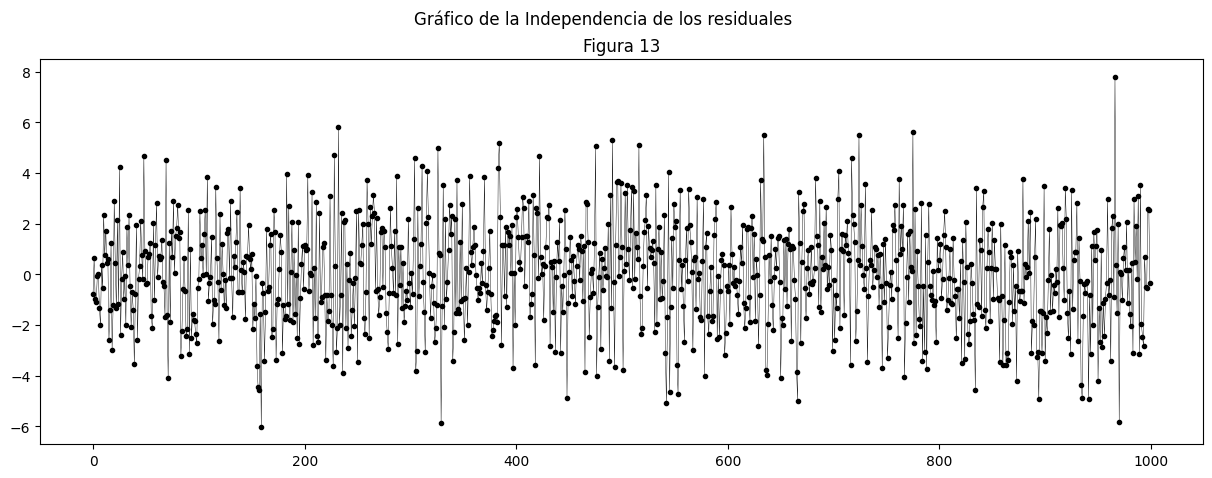

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)

### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 2.2 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.


fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle('Gráfico de la Independencia de los residuales')

ax.plot(residuales, '.-', color = "black", linewidth = 0.3)

plt.title('Figura 13')
plt.plot()

Como el estadistico de la prueba Durvin Watson 1.9819 se encuentra entre el rango [1.5, 2.5] no existe suficiente evidencia muestral para rechazar la hipotesis nula por lo tanto se supone que los residuales son independientes.

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(df_2['X_logaritmica10']))

### Como el p-valor 0.08 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral
### suficiente para rechazar la hipotesis nula por lo tanto supongo Homocedaticidad

(0.5282662931659354,
 0.46733665913366673,
 0.5274884149292245,
 0.46783499688166175)

Como el p-valor de 0.4678 es mayor al alfa de 0.05 no existe evidencia muestral suficiente para rechazar la hipotesis nula. Por lo que se supone Homocedasticidad.

### Ejercicio 3

In [ ]:
#Cargamos los datos
df_3 = pd.read_excel('/content/drive/MyDrive/Maestría CDD/Análisis Cuantitativo/Actividad Evaluativa 1/datos.xls',sheet_name='Wine Quality',skiprows=[0,1])

In [ ]:
#Examinamos los datos
df_3.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
#Eliminamos las columnas indicadas
df_3.drop(columns=['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil',
                    'Acidez Fija', 'Calidad del Vino'],inplace=True)

In [ ]:
df_3.head()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.36,20.7,45.0,170.0,1.0010,8.8
1,0.34,1.6,14.0,132.0,0.9940,9.5
2,0.40,6.9,30.0,97.0,0.9951,10.1
3,0.32,8.5,47.0,186.0,0.9956,9.9
4,0.32,8.5,47.0,186.0,0.9956,9.9


Para poder realizar las pruebas de validación y el calculo de las covarianzas primero vamos a dividir el dataset en dos.

In [ ]:
from sklearn.model_selection import train_test_split

#Vamos a dividir el dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    df_3.drop('Densidad',axis=1), df_3['Densidad'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Unimos X y Y
df_3_train = pd.concat([X_train,y_train],axis=1)
df_3_test = pd.concat([X_test,y_test],axis=1)

#Luego entrenamos el escalador solamente en el datset de entrenamieto
scaler = StandardScaler()

scaler.fit(df_3_train)

df_3_train_scaled = pd.DataFrame(scaler.transform(df_3_train), columns=df_3_train.columns)
df_3_test_scaled = pd.DataFrame(scaler.transform(df_3_test), columns=df_3_test.columns)

In [ ]:
#Reordanamos los datasets

df_3_train_scaled = df_3_train_scaled[['Densidad','Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre',
       'Dióxido de Azúfre Total', 'Alcohol']]

df_3_test_scaled = df_3_test_scaled[['Densidad','Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre',
       'Dióxido de Azúfre Total', 'Alcohol']]

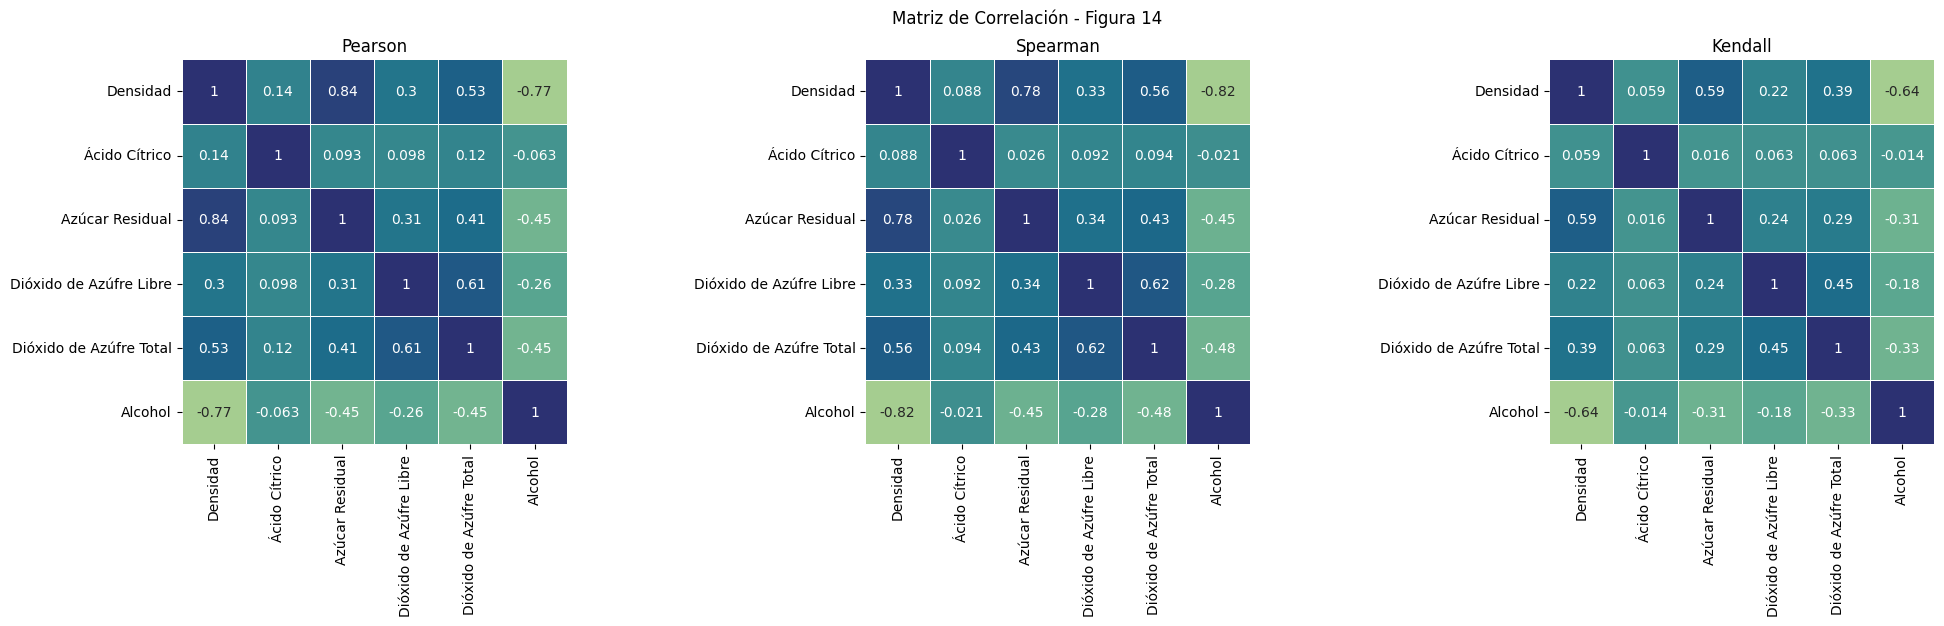

In [ ]:
#Calculamos las matrices de correlacion

corr_matrix_pearson = df_3_train_scaled.corr(method='pearson')
corr_matrix_spearman = df_3_train_scaled.corr(method='spearman')
corr_matrix_kendall = df_3_train_scaled.corr(method='kendall')

#Comparamos las matrices de covarianza

figure,axes = plt.subplots(1,3,sharex=True,figsize=(25,5))
figure.suptitle('Matriz de Correlación - Figura 14')

sns.heatmap(corr_matrix_pearson,annot=True,ax=axes[0],cmap='crest',linecolor = 'white',linewidth=.5,cbar=False,square=True)
axes[0].set_title('Pearson')
sns.heatmap(corr_matrix_spearman,annot=True,ax=axes[1],cmap='crest',linecolor = 'white',linewidth=.5,cbar=False,square=True)
axes[1].set_title('Spearman')
sns.heatmap(corr_matrix_kendall,annot=True,ax=axes[2],cmap='crest',linecolor = 'white',linewidth=.5,cbar=False,square=True)
axes[2].set_title('Kendall')


plt.show()

Comparando las correlaciones de las variables explocativas con densidad:

* La correlación de Densidad con Ácido Citrico es baja y positiva con los tres metodos y P>S>K
* La correlación de Densidad con Azúcar Residual es alta y positiva con los tres metodos y P>S>K
* La correlación de Densidad con Dióxido de Azúfre Libre es moderada y positiva con los tres metodos y S>P>K, esto nos sugiere que la relación no puede ser lineal
* La correlación de Densidad con Dióxido de Azúfre Total es alta en Pearson y Spearman, moderada con Kendall y S>P>K, esto nos sugiere que la relación no puede ser lineal
* La correlación de Densidad con Alcohol es alta y negativa con los tres metodos y S>P>K, esto nos sugiere que la relación no puede ser lineal

**Calculando los coeficientes de regresion con las tres marices de correlación**

In [ ]:


#Separamos la matrices de correlación
Corr_Matrix_XY_Pearson = corr_matrix_pearson['Densidad'][1:]
Corr_Matrix_XX_Pearson = corr_matrix_pearson.drop('Densidad',axis=1).drop('Densidad',axis=0)

Corr_Matrix_XY_Spearman = corr_matrix_spearman['Densidad'][1:]
Corr_Matrix_XX_Spearman = corr_matrix_spearman.drop('Densidad',axis=1).drop('Densidad',axis=0)

Corr_Matrix_XY_Kendall = corr_matrix_kendall['Densidad'][1:]
Corr_Matrix_XX_Kendall = corr_matrix_kendall.drop('Densidad',axis=1).drop('Densidad',axis=0)


#Calculamos los coeficientes betha1
betha_1_Pearson = np.linalg.inv(Corr_Matrix_XX_Pearson)@Corr_Matrix_XY_Pearson
betha_1_Spearman = np.linalg.inv(Corr_Matrix_XX_Spearman)@Corr_Matrix_XY_Spearman
betha_1_Kendall = np.linalg.inv(Corr_Matrix_XX_Kendall)@Corr_Matrix_XY_Kendall


#Calculamos los coeficientes betha0

betha_0_Pearson = df_3_train_scaled[['Densidad']].mean()- df_3_train_scaled.drop('Densidad',axis =1).mean(axis=0).values@betha_1_Pearson
betha_0_Spearman = df_3_train_scaled[['Densidad']].mean()- df_3_train_scaled.drop('Densidad',axis =1).mean(axis=0).values@betha_1_Spearman
betha_0_Kendall = df_3_train_scaled[['Densidad']].mean()- df_3_train_scaled.drop('Densidad',axis =1).mean(axis=0).values@betha_1_Kendall

#Unimos los coeficientes
bethas_Pearson = np.concatenate((betha_0_Pearson,betha_1_Pearson),axis =0)
bethas_Spearman = np.concatenate((betha_0_Spearman,betha_1_Spearman),axis =0)
bethas_Kendall = np.concatenate((betha_0_Kendall,betha_1_Kendall),axis =0)

In [ ]:
#Creamos un comparativo de los coeficiente
Comparativos_Bethas = pd.DataFrame()
Comparativos_Bethas['Pearson'] = bethas_Pearson.tolist()
Comparativos_Bethas['Spearman'] = bethas_Spearman.tolist()
Comparativos_Bethas['Kendall'] = bethas_Kendall.tolist()

#Comparamos los bethas
Comparativos_Bethas

,Pearson,Spearman,Kendall
0,7.174782e-15,7.189021e-15,7.191383e-15
1,5.154899e-02,5.867344e-02,3.929952e-02
2,6.046285e-01,5.025917e-01,4.138870e-01
3,-8.339784e-02,-8.268650e-02,-2.379283e-02
4,1.201190e-01,1.280183e-01,1.220393e-01
5,-4.640015e-01,-5.575138e-01,-4.720048e-01


Hacemos el calculo de las estimaciones

In [ ]:
##Creamos la matriz de disenio con el X_test
X_test_disenio = np.column_stack((np.ones(X_test.shape[0]), X_test))

#Calculamos los estimados

y_hat_Pearson = X_test_disenio@bethas_Pearson
y_hat_Spearman = X_test_disenio@bethas_Spearman
y_hat_Kendall = X_test_disenio@bethas_Kendall

In [ ]:
#Calculamos el RMSE

RMSE_Pearson = sqrt(mean_squared_error(y_test, y_hat_Pearson))
RMSE_Spearman = sqrt(mean_squared_error(y_test, y_hat_Spearman))
RMSE_Kendall = sqrt(mean_squared_error(y_test, y_hat_Kendall))

print(RMSE_Pearson)
print(RMSE_Spearman)
print(RMSE_Kendall)
#

13.326358213388229
12.928396942399315
14.341476327014245


Según el RMSE el mejor modelo es con la matriz de correlación de Spearman

In [ ]:
residuales_Pearson = y_test - y_hat_Pearson
residuales_Spearman = y_test - y_hat_Spearman
residuales_Kendall = y_test - y_hat_Kendall

**Realizamos las validaciones para Pearson**

TtestResult(statistic=-55.980944107181045, pvalue=2.1364454869566414e-307, df=979)


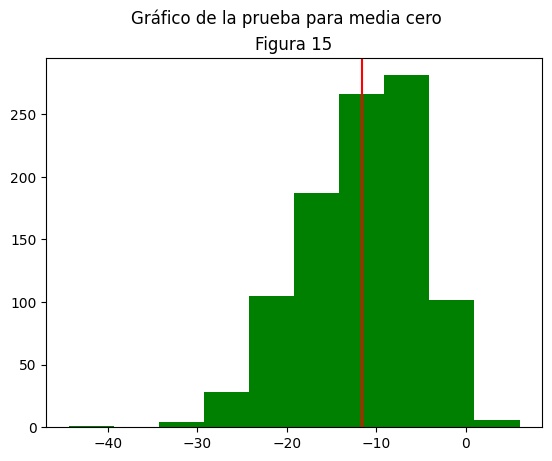

In [ ]:
#Calculo de los residuale

residuales = residuales_Pearson

## 1) Media cero en los residales
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba para media cero')

ax.hist(residuales, color = 'green')
ax.axvline(np.mean(residuales), color = "red")

plt.title('Figura 15')
plt.show()

#### Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente
#### para rechazar la hipotesis nula

La media muestral no es igual a cero, por lo que rechazamos la hipótesis nula.

ShapiroResult(statistic=0.9800423998905602, pvalue=2.4661696529180554e-10)
KstestResult(statistic=0.9402179709988987, pvalue=0.0, statistic_location=-2.230918818143204, statistic_sign=1)
AndersonResult(statistic=4.766839974060872, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-11.63267021125846, scale=6.505073909324034)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=40.44717396381002, pvalue=1.6481918771864864e-09)


[]

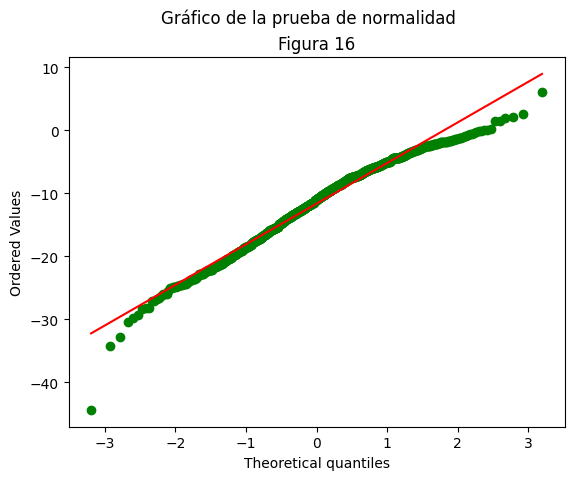

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(anderson(residuales))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba de normalidad')
probplot(residuales, dist = "norm", plot = pylab)
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_markeredgecolor('g')

plt.title('Figura 16')
plt.plot()

**Shapiro-Wilk:**

No cumple normalidad. El p-valor es extremadamente pequeño ($2.47 x 10^{10}$), mucho menor que $\alpha$ = 00.05 Esto indica que se rechaza la hipótesis nula de normalidad.

**Kolmogorov-Smirnov (KS):**

No cumple normalidad. El p-valor es 0, lo que significa que no se puede aceptar la hipótesis nula de que los residuos siguen una distribución normal.

**Anderson-Darling:**

No cumple normalidad. El valor estadístico de Anderson-Darling (4.7668) es mucho mayor que cualquiera de los valores críticos para todos los niveles de significancia (los valores críticos más bajos son 0.574 para $\alpha$ = 15%
y 1.088 para $\alpha$ = 1%).

**Jarque-Bera:**

No cumple normalidad. El p-valor es extremadamente pequeño ($1.65 x 10^{-9}$), lo que significa que se rechaza la hipótesis nula.

0.4808310131850804


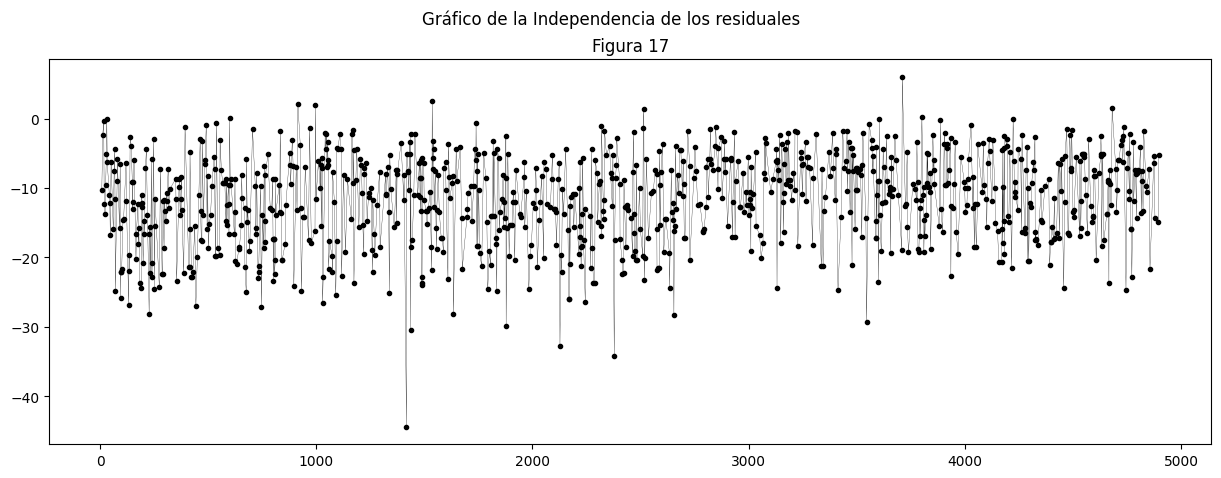

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)

### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 2.2 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.


fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle('Gráfico de la Independencia de los residuales')

ax.plot(residuales.sort_index(), '.-', color = "black", linewidth = 0.2)

plt.title('Figura 17')
plt.show()

El resultado del estadístico Durbin-Watson es 0.4808, dado que es menor a 1.5 se rechaza la hipótesis nula.

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(X_test))

### Como el p-valor 0.08 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral
### suficiente para rechazar la hipotesis nula por lo tanto supongo Homocedaticidad

(879.9909477803895, 5.693895107872942e-188, 1714.0672051485178, 0.0)

**Realizamos las validaciones para Spearman**

TtestResult(statistic=-53.349176098579825, pvalue=5.662903199433615e-292, df=979)


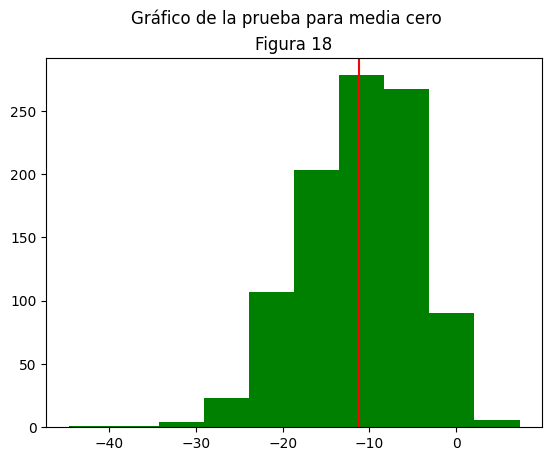

In [ ]:
#Calculo de los residuale

residuales = residuales_Spearman

## 1) Media cero en los residales
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba para media cero')

ax.hist(residuales, color = 'green')
ax.axvline(np.mean(residuales), color = "red")

plt.title('Figura 18')
plt.show()

#### Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente
#### para rechazar la hipotesis nula

La mayor parte de los datos se distribuyen lejos de 0, con una media negativa.

ShapiroResult(statistic=0.9817518889024512, pvalue=9.88619890173368e-10)
KstestResult(statistic=0.9203614871367654, pvalue=0.0, statistic_location=-2.3170406865298636, statistic_sign=1)
AndersonResult(statistic=3.9464615561689698, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-11.151904308884228, scale=6.543865362423553)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=45.12725334406548, pvalue=1.5876012954518734e-10)


[]

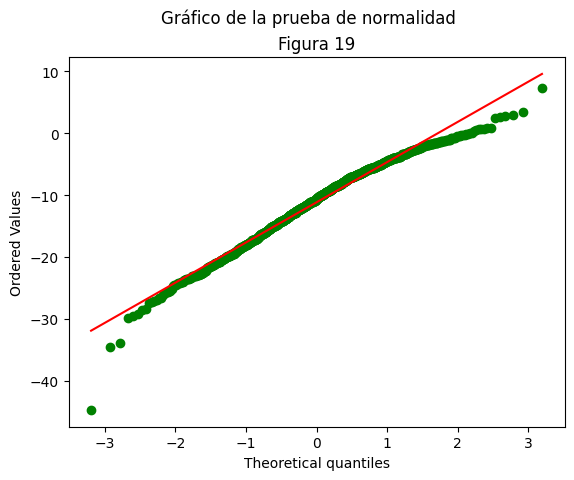

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(anderson(residuales))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba de normalidad')
probplot(residuales, dist = "norm", plot = pylab)
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_markeredgecolor('g')

plt.title('Figura 19')
plt.plot()

**Prueba de Shapiro-Wilk:** No hay distribución normal. El valor p es significativamente menor que 0.05, se rechaza la hipótesis nula de normalidad.

**Prueba de Kolmogorov-Smirnov:** No hay distribución normal. El valor p es 0.0. Por esta razón se rechaza la hipótesis nula de normalidad.

**Prueba de Anderson:** El estadístico es mayor que todos los valores críticos, por lo que se rechaza la hipótesis nula de normalidad.

0.5165298118657943


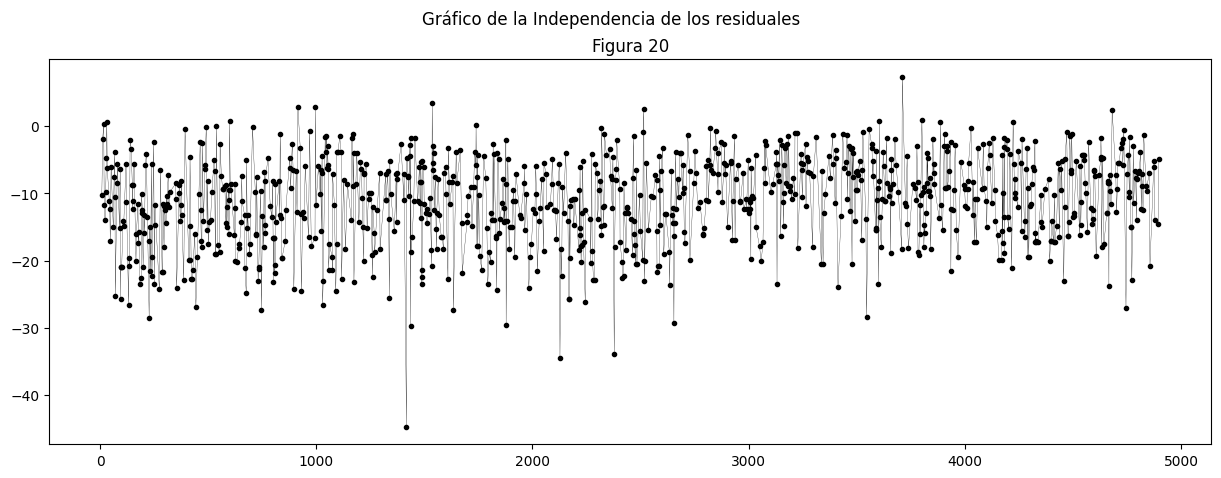

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)

### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 2.2 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.


fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle('Gráfico de la Independencia de los residuales')

ax.plot(residuales.sort_index(), '.-', color = "black", linewidth = 0.2)

plt.title('Figura 20')
plt.show()

Existe autocorrelación positiva significativa entre los residuos. Por lo tanto, rechazamos la hipótesis nula (H₀)

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(X_test))

### Como el p-valor 0.08 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral
### suficiente para rechazar la hipotesis nula por lo tanto supongo Homocedaticidad

(866.1055196192106, 5.7577723341746104e-185, 1481.3479516982775, 0.0)

**Realizamos las validaciones para Kendall**

TtestResult(statistic=-61.77930585699833, pvalue=0.0, df=979)


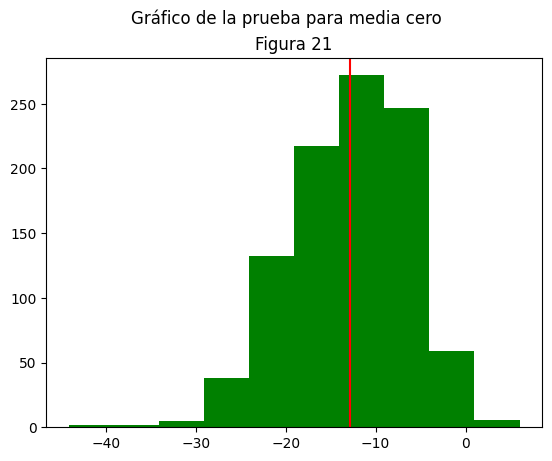

In [ ]:
#Calculo de los residuale

residuales = residuales_Kendall

## 1) Media cero en los residales
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba para media cero')

ax.hist(residuales, color = 'green')
ax.axvline(np.mean(residuales), color = "red")

plt.title('Figura 21')
plt.show()

#### Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente
#### para rechazar la hipotesis nula

La media muestral se aleja de cero.

ShapiroResult(statistic=0.980767376935669, pvalue=4.4026542137655e-10)
KstestResult(statistic=0.9689341455251735, pvalue=0.0, statistic_location=-2.695435522929837, statistic_sign=1)
AndersonResult(statistic=4.060185524189819, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-12.794156752597807, scale=6.4830844800594765)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=58.817625257339515, pvalue=1.690109940303019e-13)


[]

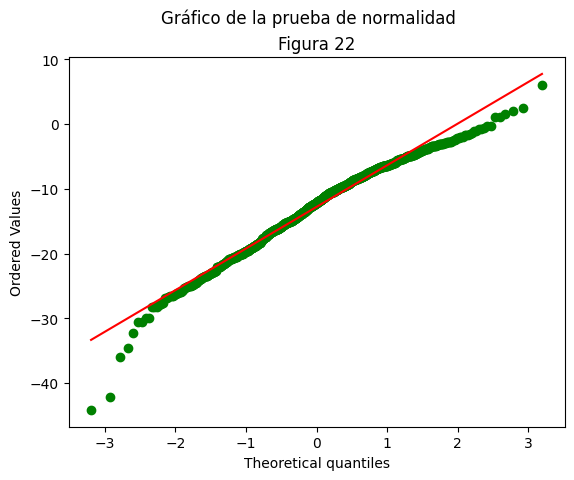

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(anderson(residuales))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad

fig, ax = plt.subplots()

fig.suptitle('Gráfico de la prueba de normalidad')
probplot(residuales, dist = "norm", plot = pylab)
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_markeredgecolor('g')

plt.title('Figura 22')
plt.plot()

**Prueba de Shapiro-Wilk:** Se rechaza la hipótesis nula de normalidad. Esto indica que los datos no provienen de una distribución normal.

**Prueba de Kolmogorov-Smirnov:** Es 0.968934, y el valor p es 0.0. Nos indica que los datos no son normales.

**Prueba de Anderson:** Se rechaza la hipótesis nula de normalidad.

0.4141349650912978


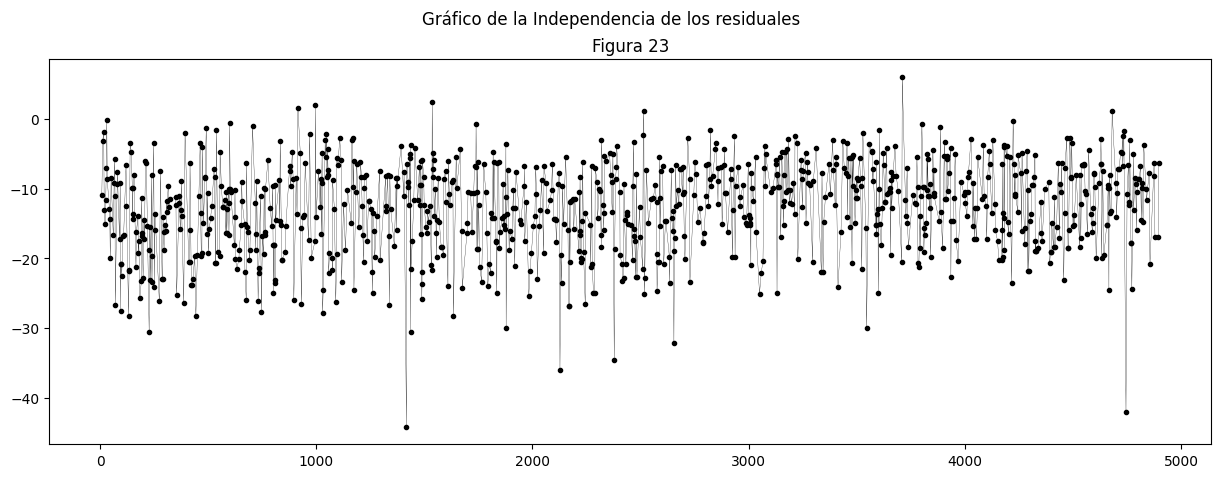

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)

### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 2.2 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.


fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle('Gráfico de la Independencia de los residuales')

ax.plot(residuales.sort_index(), '.-', color = "black", linewidth = 0.2)

plt.title('Figura 23')
plt.show()

Hay una fuerte evidencia de autocorrelación positiva en los residuos ya que no son independientes

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(X_test))

### Como el p-valor 0.08 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral
### suficiente para rechazar la hipotesis nula por lo tanto supongo Homocedaticidad

(884.3181604350218, 6.5910627371670446e-189, 1800.3957536346888, 0.0)

**Gráficando la dispersión de los datos**

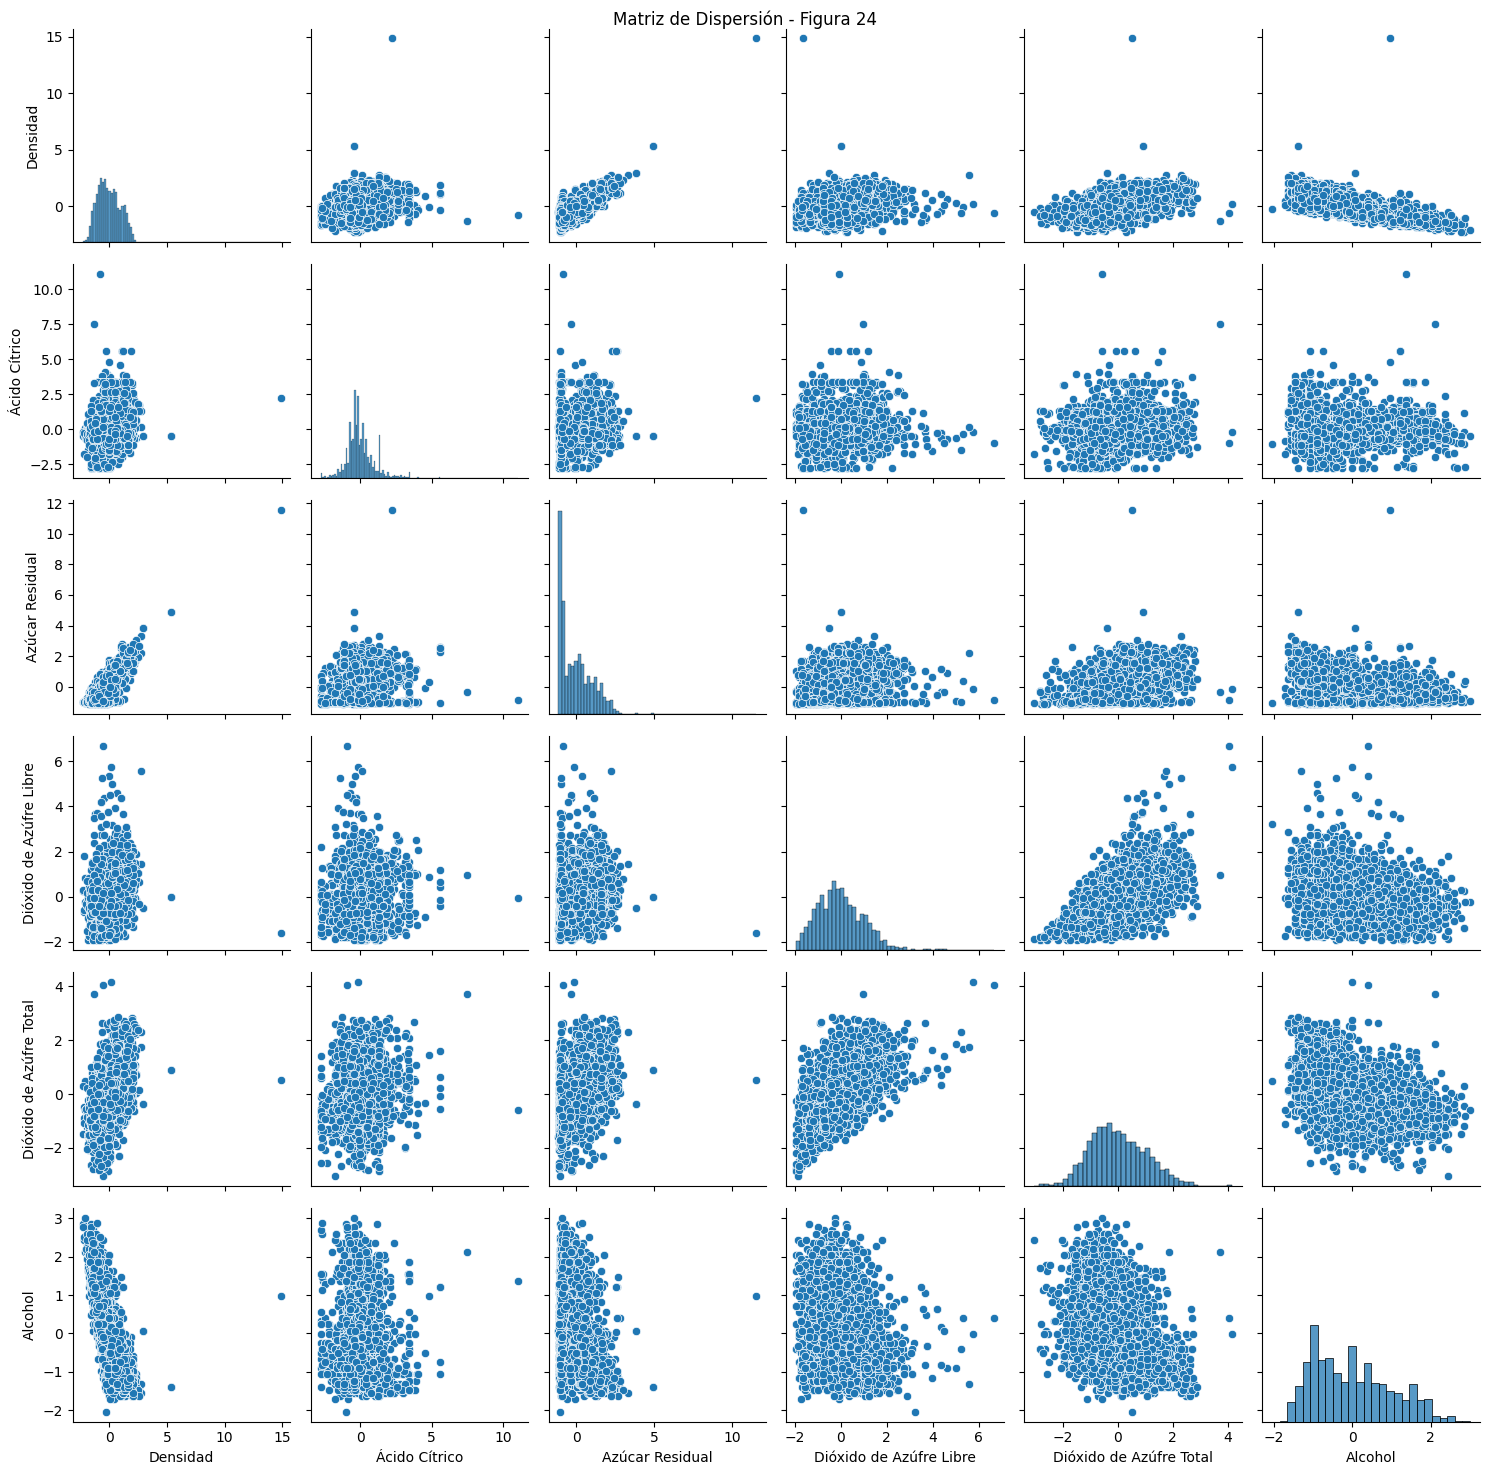

In [ ]:

sns.pairplot(df_3_train_scaled)
plt.suptitle('Matriz de Dispersión - Figura 24')
plt.tight_layout()
plt.show()
#

Al visualizar el diagrama de dispersión vemos que el grafico del Ácido Cítrico y Dióxido de Azufre Libre no muestran un comportamiento lineal con la Densidad. Se realizaran transformaciones sobre estas dos variables intentando mejorar la relación lineal.

In [ ]:
#Transformaciones realizadas en Acido Citrico
df_3_train_scaled['Ácido Cítrico Exp'] = np.exp(df_3_train_scaled['Ácido Cítrico'])
df_3_train_scaled['Ácido Cítrico Raiz'] = np.sqrt(df_3_train_scaled['Ácido Cítrico'])
df_3_train_scaled['Ácido Cítrico Raiz Cubica'] = np.cbrt(df_3_train_scaled['Ácido Cítrico'])
df_3_train_scaled['Ácido Cítrico Log'] = np.log(df_3_train_scaled['Ácido Cítrico'])
df_3_train_scaled['Ácido Cítrico Division'] = 1/(df_3_train_scaled['Ácido Cítrico'])
df_3_train_scaled['Ácido Cítrico Ln10'] = np.log10(df_3_train_scaled['Ácido Cítrico'])
df_3_train_scaled['Ácido Cítrico Ln2'] = np.log2(df_3_train_scaled['Ácido Cítrico'])

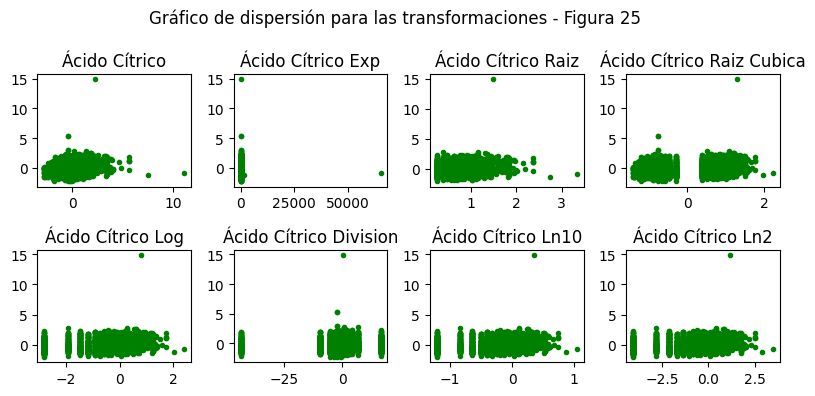

In [ ]:
fig, ax =   plt.subplots(nrows=2, ncols=4, figsize=(8,4))

plt.suptitle('Gráfico de dispersión para las transformaciones - Figura 25')

ax[0,0].plot(df_3_train_scaled['Ácido Cítrico'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,0].set_title('Ácido Cítrico')

ax[0,1].plot(df_3_train_scaled['Ácido Cítrico Exp'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,1].set_title('Ácido Cítrico Exp')

ax[0,2].plot(df_3_train_scaled['Ácido Cítrico Raiz'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,2].set_title('Ácido Cítrico Raiz')

ax[0,3].plot(df_3_train_scaled['Ácido Cítrico Raiz Cubica'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,3].set_title('Ácido Cítrico Raiz Cubica')

ax[1,0].plot(df_3_train_scaled['Ácido Cítrico Log'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,0].set_title('Ácido Cítrico Log')

ax[1,1].plot(df_3_train_scaled['Ácido Cítrico Division'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,1].set_title('Ácido Cítrico Division')

ax[1,2].plot(df_3_train_scaled['Ácido Cítrico Ln10'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,2].set_title('Ácido Cítrico Ln10')

ax[1,3].plot(df_3_train_scaled['Ácido Cítrico Ln2'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,3].set_title('Ácido Cítrico Ln2')

plt.tight_layout()
plt.show()

Al examinar visualmente las transformaciones no encontramos una que claramente tenga una relación lineal para Ácido Cítrico. Las transformaciones de Raiz Cuadrada, Log, Log10 y Ln2 se descartan porque generan NaN por los valores negativos.

In [ ]:
#Transformaciones realizadas en Dioxido de Azufre Libre
df_3_train_scaled['Dióxido de Azúfre Libre Exp'] = np.exp(df_3_train_scaled['Dióxido de Azúfre Libre'])
df_3_train_scaled['Dióxido de Azúfre Libre Raiz'] = np.sqrt(df_3_train_scaled['Dióxido de Azúfre Libre'])
df_3_train_scaled['Dióxido de Azúfre Libre Raiz Cubica'] = np.cbrt(df_3_train_scaled['Dióxido de Azúfre Libre'])
df_3_train_scaled['Dióxido de Azúfre Libre Log'] = np.log(df_3_train_scaled['Dióxido de Azúfre Libre'])
df_3_train_scaled['Dióxido de Azúfre Libre Division'] = 1/(df_3_train_scaled['Dióxido de Azúfre Libre'])
df_3_train_scaled['Dióxido de Azúfre Libre Ln10'] = np.log10(df_3_train_scaled['Dióxido de Azúfre Libre'])
df_3_train_scaled['Dióxido de Azúfre Libre Ln2'] = np.log2(df_3_train_scaled['Dióxido de Azúfre Libre'])


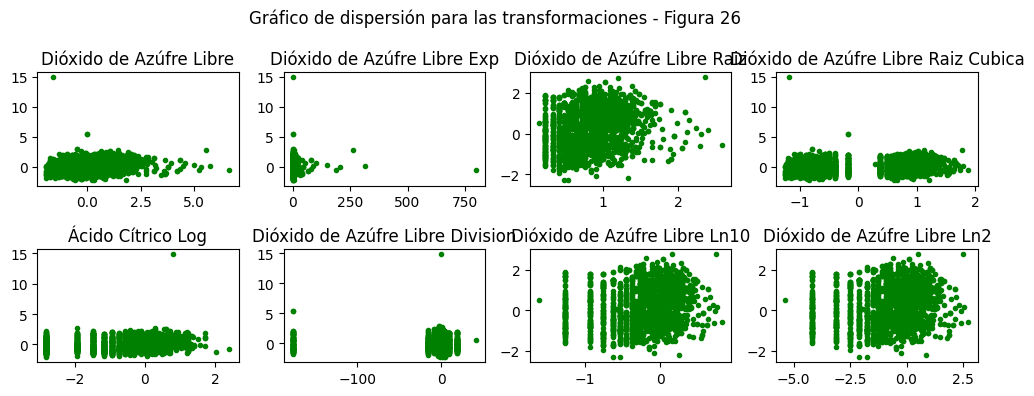

In [ ]:
fig, ax =   plt.subplots(nrows=2, ncols=4, figsize=(10,4))

plt.suptitle('Gráfico de dispersión para las transformaciones - Figura 26')

ax[0,0].plot(df_3_train_scaled['Dióxido de Azúfre Libre'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,0].set_title('Dióxido de Azúfre Libre')

ax[0,1].plot(df_3_train_scaled['Dióxido de Azúfre Libre Exp'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,1].set_title('Dióxido de Azúfre Libre Exp')

ax[0,2].plot(df_3_train_scaled['Dióxido de Azúfre Libre Raiz'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,2].set_title('Dióxido de Azúfre Libre Raiz')

ax[0,3].plot(df_3_train_scaled['Dióxido de Azúfre Libre Raiz Cubica'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[0,3].set_title('Dióxido de Azúfre Libre Raiz Cubica')

ax[1,0].plot(df_3_train_scaled['Ácido Cítrico Log'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,0].set_title('Ácido Cítrico Log')

ax[1,1].plot(df_3_train_scaled['Dióxido de Azúfre Libre Division'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,1].set_title('Dióxido de Azúfre Libre Division')

ax[1,2].plot(df_3_train_scaled['Dióxido de Azúfre Libre Ln10'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,2].set_title('Dióxido de Azúfre Libre Ln10')

ax[1,3].plot(df_3_train_scaled['Dióxido de Azúfre Libre Ln2'],df_3_train_scaled['Densidad'],'.', color ='green')
ax[1,3].set_title('Dióxido de Azúfre Libre Ln2')

plt.tight_layout()
plt.show()

Al examinar visualmente las transformaciones no encontramos una que claramente tenga una relación lineal para Dióxido de Azufre Libre. Las transformaciones de Raiz Cuadrada, Log, Log10 y Ln2 se descartan porque generan NaN por los valores negativos.

Se va a evaluar las diferentes transformaciones para el Ácido Citrico de acuerdo al RMSE que generan cada uno de los modelos resultantes de las transformaciones.

In [ ]:
#La lista de transformaciones a evaluar de Acido Citrico
transformaciones_Acido_Citrico = ['Ácido Cítrico',
                    'Ácido Cítrico Exp', 'Ácido Cítrico Raiz Cubica',
                    'Ácido Cítrico Division']


bethas_acido_citrico = []
RMSEs = []

#iteramos para cada uno de ellos
for i in transformaciones_Acido_Citrico:
  #Filtramos el dataset
  df_temp = df_3_train_scaled[[i,'Azúcar Residual','Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Alcohol','Densidad']]

  #Calculamos la matriz de covarianzas
  Sigma = df_temp.cov().values

  #Separamos la matriz
  Sigma_XX = Sigma[0:-1,0:-1]
  Sigma_XY = Sigma[0:-1,-1]

  #Calculamos los coeficientes
  betha_1p = np.linalg.inv(Sigma_XX)@Sigma_XY
  betha_0 = df_temp[['Densidad']].mean()- df_temp.drop('Densidad',axis =1).mean(axis=0).values@betha_1p

  #Unimos los coeficientes
  bethas_completos = np.concatenate((betha_0,betha_1p),axis =0)
  bethas_acido_citrico.append(bethas_completos)

  #Creamos matriz de disenio
  df_temp_disenio = np.column_stack((np.ones(df_temp.shape[0]), df_temp[[i,'Azúcar Residual','Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Alcohol']]))

  #Calculamos los estimados
  y_hat_temp = df_temp_disenio@bethas_completos
  RMSE_temp = sqrt(mean_squared_error(df_temp['Densidad'], y_hat_temp))

  RMSEs.append(RMSE_temp)

In [ ]:
#RMSE de las trasnformaciones del ácido citríco
RMSEs

[0.2909314136894427,
 0.29530850961262983,
 0.28946176067659607,
 0.29518958241324483]

In [ ]:
bethas_acido_citrico[2]

array([ 0.0074013 ,  0.06993446,  0.60654119, -0.0838267 ,  0.11981574,
       -0.4631999 ])

Aqui vemos que la transformación de la Raiz Cubica mejora el modelo con el criterio del RMSE.

Se va a evaluar las diferentes transformaciones para el Dióxido de Azúfre Libre  de acuerdo al RMSE que generan cada uno de los modelos resultantes de las transformaciones.

In [ ]:
#La lista de transformaciones a evaluar de Dioxido Libre

transformaciones_Dioxido_Libre = ['Dióxido de Azúfre Libre',
                                  'Dióxido de Azúfre Libre Exp', 'Dióxido de Azúfre Libre Raiz Cubica',
                                  'Dióxido de Azúfre Libre Division']

bethas = []
RMSEs = []

#iteramos para cada uno de ellos
for i in transformaciones_Dioxido_Libre:
  #Filtramos el dataset
  df_temp = df_3_train_scaled[[i,'Ácido Cítrico','Azúcar Residual', 'Dióxido de Azúfre Total', 'Alcohol','Densidad']]

  #Calculamos la matriz de covarianzas
  Sigma = df_temp.cov().values

  #Separamos la matriz
  Sigma_XX = Sigma[0:-1,0:-1]
  Sigma_XY = Sigma[0:-1,-1]

  #Calculamos los coeficientes
  betha_1p = np.linalg.inv(Sigma_XX)@Sigma_XY
  betha_0 = df_temp[['Densidad']].mean()- df_temp.drop('Densidad',axis =1).mean(axis=0).values@betha_1p

  #Unimos los coeficientes
  bethas_completos = np.concatenate((betha_0,betha_1p),axis =0)
  bethas.append(bethas_completos)

  #Creamos matriz de disenio
  df_temp_disenio = np.column_stack((np.ones(df_temp.shape[0]), df_temp[[i,'Ácido Cítrico','Azúcar Residual', 'Dióxido de Azúfre Total', 'Alcohol']]))

  #Calculamos los estimados
  y_hat_temp = df_temp_disenio@bethas_completos
  RMSE_temp = sqrt(mean_squared_error(df_temp['Densidad'], y_hat_temp))

  RMSEs.append(RMSE_temp)

In [ ]:
#RMSE de las trasnformaciones del Dióxido de Azúfre Libre
RMSEs

[0.29093141368944264,
 0.29813072325168033,
 0.2915715894821608,
 0.2981323987890811]

Para el Dioxido de Azufre Libre ninguna de las transformaciones mejora el modelo por lo que se descartan.

In [ ]:
bethas_acido_citrico_raiz_cubica = bethas_acido_citrico[2]

print(bethas_acido_citrico_raiz_cubica)

[ 0.0074013   0.06993446  0.60654119 -0.0838267   0.11981574 -0.4631999 ]


Entonces el modelo RLM adecuado será solamente con la transformación de la raíz cubica del Ácido Citríco.

$$\hat{y} = 0.0074 + 0.0699*Ácido\,Citríco\,Raíz\,Cúbica + 0.6065*Ázucar\,Residual\\-0.0838*Dióxido\,de\,Azúfre\,Libre+0.1198*Dioxido\,de\,Azúfre\,Total-0.4631*Alcohol $$



* Con un coeficiente  $β_1 =0.0699$, podemos concluir que por cada aumento en una unidad de la variable Ácido Citríco Raíz Cúbica se espera que en promedio la varible Densidad AUMENTE (porque el signo es positivo) 0.0699 unidades.

* Con un coeficiente $β_2 =0.6065$, podemos concluir que por cada aumento en una unidad de la variable Ázucar Residual se espera que en promedio la varible Densidad AUMENTE (porque el signo es positivo) 0.6065 unidades.

* Con un coeficiente $β_3 =-0.0838$, podemos concluir que por cada aumento en una unidad de la variable Dióxico de Azúfre Libre se espera que en promedio la varible Densidad DISMINUYA (porque el signo es negativo) -0.0838 unidades.

* Con un coeficiente  $β_4 =0.1198$, podemos concluir que por cada aumento en una unidad de la variable Dióxido de Azúfre Total se espera que en promedio la varible Densidad AUMENTE (porque el signo es positivo) 0.1198 unidades.

* Con un coeficiente  $β_5 =-0.4631$, podemos concluir que por cada aumento en una unidad de la variable Alcohol se espera que en promedio la varible Densidad DISMINUYA (porque el signo es negativo) -0.4631 unidades.



### Ejercicio 4

In [ ]:
# Leer el archivo CSV
df_4 = pd.read_csv('/content/drive/MyDrive/Maestría CDD/Análisis Cuantitativo/Actividad Evaluativa 1/publicidad.csv')
df_4 = df_4.loc[:, ~df_4.columns.str.contains('^Unnamed')]

Graficar las ventas vs la cantidad de anuncios publicitarios

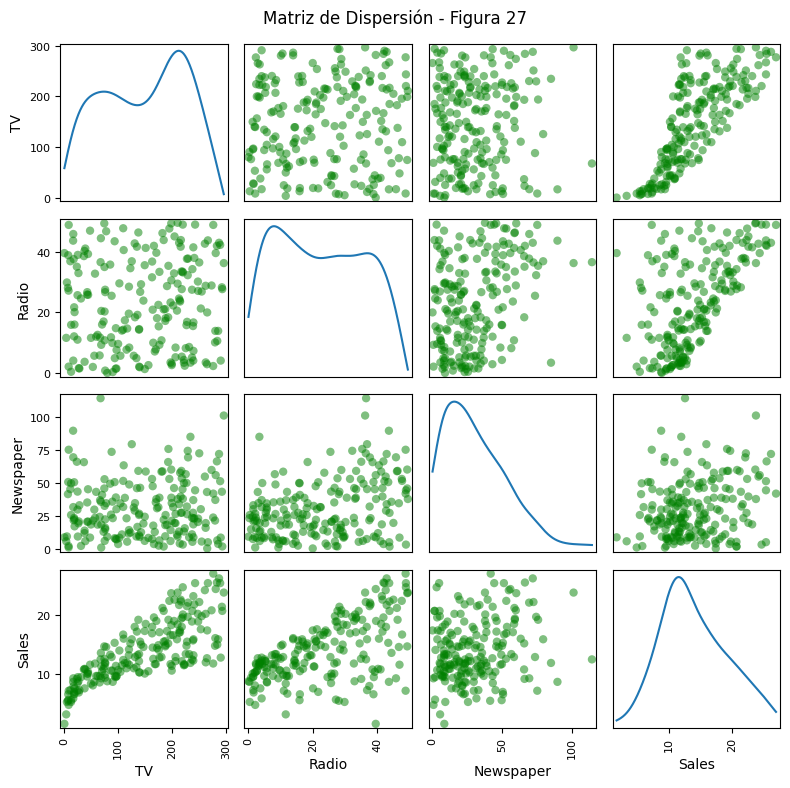

In [ ]:
# Ordenar las variables
df_4 = df_4[['TV', 'Radio', 'Newspaper', 'Sales']]

# Crear la matriz de gráficos de dispersión
scatter_matrix(df_4, figsize=(8, 8), diagonal='kde', marker='o', color='green')
plt.suptitle('Matriz de Dispersión - Figura 27')
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En el siguiente gráfico, se identifica que la publicidad que tiene un comportamiento más uniforme con respecto a las unidades vendidas es el de TV. Pues a medida que se invierte en este canal de publicidad, el número de ventas aumenta, es directamente proporcional. (Probablemente porque hay más usuarios que acceden a este medio)

En consecuencia, se observa lo anterior en la publicidad Radio, pero en este se encuentra una dispersión moderada.

Y en el último tipo de publicidad, encontramos una dispersión alta.

Cálculo del coficiente de correlación, representación en un mapa de calor e interpretación de las estructuras encontradas


In [ ]:
# Calcular el coeficiente de correlación entre todas las variables
correlation_matrix = df_4.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


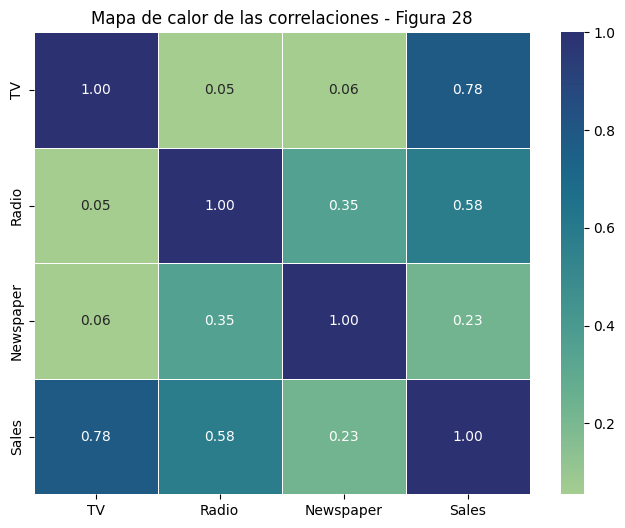

In [ ]:
# Crear el mapa de calor utilizando seaborn

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de calor de las correlaciones - Figura 28')

plt.show()

Analizando la matriz de correlación y el mapa de calor, reafirmamos las anteriores afirmaciones.
Observamos que tenemos una correlación positiva de 0.78 cercana a 1 entre el canal de publicidad TV y las unidades vendidas, lo que indica una alta dependencia.
Seguido tenemos una correlación de 0.58 con la radio y una efectividad baja en cuanto a la publicidad con Periódico de 0.23


Modelado de las ventas con la variable TV, ajuste de modelo RLS, ecuación de la recta y valor del coeficiente R²

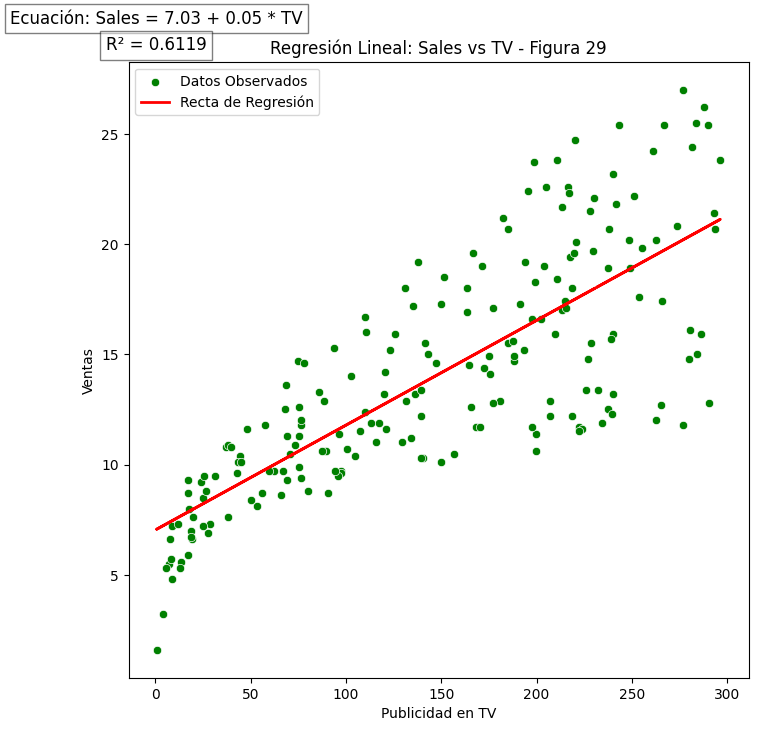

In [ ]:
# Seleccionar las variables
X = df_4['TV']  # Variable explicativa
y = df_4['Sales']  # Variable dependiente

# Agregar una constante a X para el término independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados
intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared

# Imprimir la ecuación de la recta
equation_text = f"Ecuación: Sales = {intercept:.2f} + {slope:.2f} * TV"
r_squared_text = f"R² = {r_squared:.4f}"

# Visualizar los datos y la recta de regresión
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_4['TV'], y=df_4['Sales'], color='green', label='Datos Observados')
plt.plot(df_4['TV'], intercept + slope * df_4['TV'], color='red', label='Recta de Regresión', linewidth=2)

# Añadir texto con la ecuación y el valor de R²
plt.text(0.5, 30, equation_text, fontsize=12, ha='center', color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.5, 28.8, r_squared_text, fontsize=12, ha='center', color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Regresión Lineal: Sales vs TV - Figura 29')
plt.xlabel('Publicidad en TV')
plt.ylabel('Ventas')
plt.legend()
plt.show()

A continuación, presentamos el modelo de regresión lineal simple escogiendo como variable explicativa “TV”:
-	**Ecuación de la recta:  Sales = 7.03 + 0.05*TV**
-	**Valor R2 = 0.612**

El R2 nos indica que el 61.2% de la variabilidad en las ventas depende de la inversión en el canal de publicidad TV y que el 38.8% restante se debe a las demás variables o factores no considerados en el modelo.

Predicción del retorno de inversión esperado cuando se realizan 5 anuncios en la TV.

In [ ]:
# @title
# Realizar la predicción para 5 anuncios
new_data = pd.DataFrame({'const': 1, 'TV': [5]})  # Crear un DataFrame con el valor 5 para la predicción
prediction = model.get_prediction(new_data)

# Obtener la media predicha y el intervalo de confianza al 95%
predicted_value = prediction.predicted_mean[0]
confidence_interval = prediction.conf_int(alpha=0.05)  # Intervalo de confianza al 95%

# Mostrar resultados
print(f"Predicción del retorno de inversión (Ventas) para 5.000 dolares en anuncios en TV: {predicted_value:.2f}")
print(f"Intervalo de confianza al 95%: [{confidence_interval[0, 0]:.2f}, {confidence_interval[0, 1]:.2f}]")

Predicción del retorno de inversión (Ventas) para 5.000 dolares en anuncios en TV: 7.27
Intervalo de confianza al 95%: [6.39, 8.15]


Predicción del retorno de inversión (Ventas) para 5 anuncios en TV: 7.27
Intervalo de confianza al 95%: [6.39, 8.15].

Esto quiere decir que cuando se invierten 5.000 dolares en la creacion de anuncios del canal, estamos seguros en un 95% que las ventas se encontraran entre 6.39 y 8.15 miles de unidades.